In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy
from z3 import *

https://cracking-the-cryptic.web.app/sudoku/3Btgb7QLLp

In [ ]:
fixed =[[0, 0, 0, 0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 3, 4, 0],
        [0, 0, 0, 0, 0, 0, 0, 5, 6],
        [0, 0, 0, 0, 0, 0, 0, 0, 7],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [7, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 4, 8, 0, 0, 0, 0, 0, 0],
        [0, 0, 6, 3, 0, 0, 0, 0, 0]]

Took 0.050853729248046875 secs


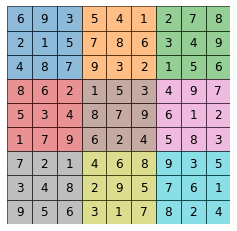

In [13]:
def z3_sudoku(grid):

    s = Tactic("pqffd").solver()
    N =9
    X = np.array(IntVector('x', N*N),dtype=object).reshape((N,N))

    #standard rules
    s += [And(e>0,e<10) for (i,j),e in np.ndenumerate(X)]
    s += [Distinct([e for (i,j),e in np.ndenumerate(X) if i == n]) for n in range(N)]
    s += [Distinct([e for (i,j),e in np.ndenumerate(X) if j == n]) for n in range(N)]
    
    groups = np.block([[np.ones((3,3),dtype=int)*(i+j*3) for i in range(3)]for j in range(3)])
    s += [Distinct([e for (i,j),e in np.ndenumerate(X) if groups[i,j] == n]) for n in range(N)]
    
    #given cells
    s += [e==int(grid[i,j]) for (i,j),e in np.ndenumerate(X) if grid[i,j] !=0]
    
    #hidden clone
    clone = [(0,0),(1,-1),(1,1),(2,0),(2,2),(3,1),(3,3),(4,2)]
    s += Or([And([X[i+a,j+b] == X[2+a,3+b] for a,b in clone]) for i in range(5) for j in range(1,6) if (i,j) != (2,3)])
    
  
    start = time.time()
    evalu = np.vectorize(lambda x :m.evaluate(x).as_long())
    if s.check() == sat:
        print("Took {} secs".format(time.time()-start))
        m = s.model()
        result = evalu(X)
        fig,ax = plt.subplots(1,1,figsize=(4,4))        
        ax = sns.heatmap(groups,annot=result,cbar=False,
                         cmap="tab10",linecolor="k",linewidths=1,annot_kws={"size":12,"color":"k"},alpha =.5)
        ax.axis("off")


z3_sudoku(np.array(fixed))

In [ ]:
soln =[[6,9,3,5,4,1,2,7,8],
       [2,1,5,7,8,6,3,4,9],
       [4,8,7,9,3,2,1,5,6],
       [8,6,2,1,5,3,4,9,7], 
       [5,3,4,8,7,9,6,1,2],
       [1,7,9,6,2,4,5,8,3],
       [7,2,1,4,6,8,9,3,5],
       [3,4,8,2,9,5,7,6,1],
       [9,5,6,3,1,7,8,2,4]]